In [3]:
from google.colab import drive
drive.mount('/content/drive/')

ModuleNotFoundError: No module named 'google'

In [10]:
# Importing necessary libraries
import tensorflow as tf  # TensorFlow for deep learning
import os  # For handling file paths
import numpy as np  # For data manipulation
import matplotlib.pyplot as plt  # For visualizing the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For loading and augmenting image data
from sklearn.model_selection import train_test_split  # For splitting custom dataset into train and test


In [12]:
# Define dataset paths
base_dir = '/Users/maguotong/Desktop/COMP172AIBH/all_data'  # Update this to the actual path


# Define parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 16
NUM_EPOCHS=10
RAN_SEED=17
tf.keras.utils.set_random_seed(RAN_SEED)

# Use ImageDataGenerator for loading and splitting data
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.3)  # Split 50% of the data for validationall_data_bright

# Creating train and validation datasets
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=RAN_SEED
)

validation_data = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=RAN_SEED
)

print("Training and validation datasets prepared successfully.")


Found 183 images belonging to 2 classes.
Found 77 images belonging to 2 classes.
Training and validation datasets prepared successfully.


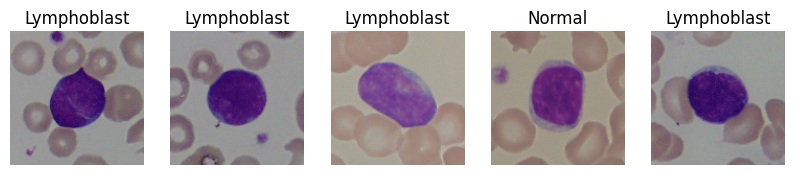

In [13]:
# Function to display a few images from the dataset
def visualize_dataset(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset):
        if i >= num_images:
            break
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image[0])  # Image comes as a batch, so we take the first image
        plt.title("Lymphoblast" if label[0] == 1 else "Normal")
        plt.axis("off")
    plt.show()



# Displaying a few images from the training dataset
visualize_dataset(train_data, num_images=5)


# White Blood Cell Classification (Part 2)

**Objective.** Improve model performance with refined training and evaluation.

**Pipeline.** Hyperparameter tuning, model comparison, and improved generalization.

**Evaluation.** Comparative metrics and error analysis.


In [15]:
# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    #Add a pooling layer here. You need to add "," after each layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    #Add a pooling layer here. You need to add "," after each layer
    tf.keras.layers.MaxPooling2D(2, 2),
    #Add a Convolutional layer here with 128 filters. You need to add "," after each layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
     #Add a dropout layer here with a rate of 0.2. [In sequential mode, you need to add "," after each layer]
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)




**How many parameters does your model have?** Hint: use the keras.model API to summarize your model: https://keras.io/api/models/

In [16]:
# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,473 (6.22 MB)

 Trainable params: 1,629,473 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,  # You can increase the number of epochs based on your needs
    verbose=1
)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4481 - loss: 0.7614 - val_accuracy: 0.4805 - val_loss: 0.6985
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5137 - loss: 0.6940 - val_accuracy: 0.5195 - val_loss: 0.6853
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4536 - loss: 0.6913 - val_accuracy: 0.4805 - val_loss: 0.6852
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7158 - loss: 0.6605 - val_accuracy: 0.4805 - val_loss: 0.7089
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7104 - loss: 0.6027 - val_accuracy: 0.8052 - val_loss: 0.5160
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7158 - loss: 0.5108 - val_accuracy: 0.6234 - val_loss: 0.6593
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6940 - loss: 0.5223 - val_accuracy: 0.5714 - val_loss: 0.6858
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7596 - loss: 0.4937 - val_accuracy: 0.6234 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7662 - loss: 0.4602
Validation Accuracy: 0.77


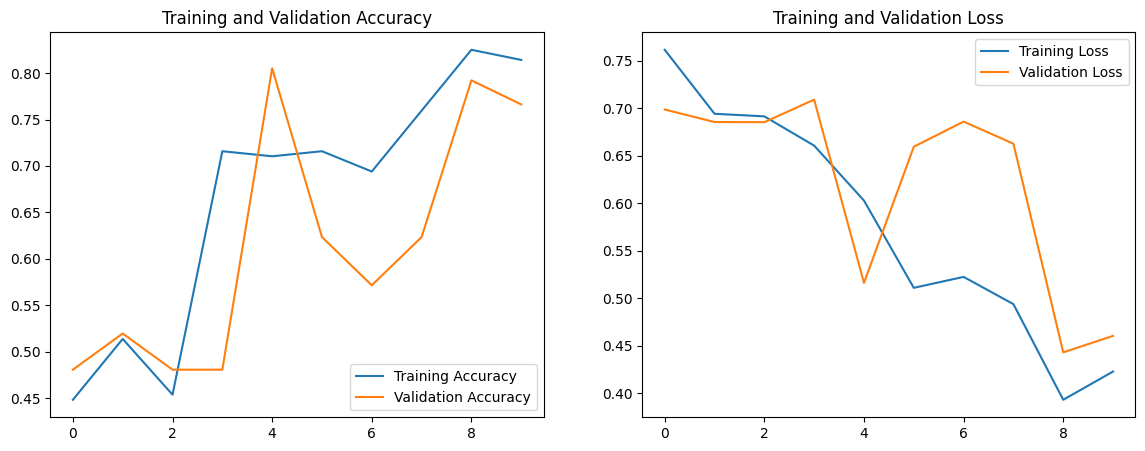

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training and validation accuracy over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


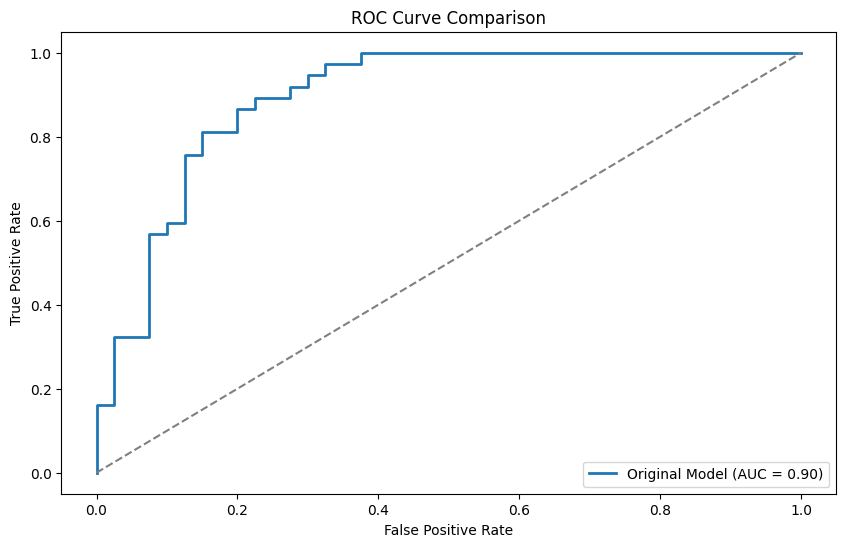

In [19]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# Function to plot ROC curves for multiple models on the same plot
def plot_roc_curves(models, validation_data_list, labels, title="ROC Curve Comparison"):
    plt.figure(figsize=(10, 6))

    # Iterate over each model and its corresponding validation data
    for model, validation_data, label in zip(models, validation_data_list, labels):
        y_true = []
        y_pred = []

        # Get true labels and predicted probabilities
        for images, labels_batch in validation_data:
            y_true.extend(labels_batch)
            preds = model.predict(images)
            y_pred.extend(preds)

            # Break after one full pass (since it's a generator)
            if len(y_true) >= validation_data.samples:
                break

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        # Compute False Positive Rate (FPR) and True Positive Rate (TPR)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC Curve for the current model
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plot the random guess line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line

    # Configure plot settings
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for the original model and MobileNet model on the same plot
plot_roc_curves(
    models=[model],
    validation_data_list=[validation_data],
    labels=["Original Model", "Original Model with Data Augmentation"]
)

In [22]:
external_dir = '/Users/maguotong/Desktop/COMP172AIBH/external_test'  # Update this to the actual path
lymphoblast_dir = os.path.join(base_dir, 'lymphoblast')
normal_dir = os.path.join(base_dir, 'healthy')

# Define parameters
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 16

# Use ImageDataGenerator for loading and splitting data
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.9,  # Split 10% of the data for validation
)

# Creating train and validation datasets
test_data = datagen.flow_from_directory(
    external_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 199 images belonging to 2 classes.


In [25]:
# Plot ROC curves for the original model and MobileNet model on the same plot
## ... add your code here ... ##

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to compute and plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap("Blues"))
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Print values inside the matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Collect true labels and predictions for the ConvNet model
y_true = []
y_pred = []

for images, labels_batch in test_data:
    y_true.extend(labels_batch)
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype(int).flatten())  # Convert probabilities to binary labels

    if len(y_true) >= test_data.samples:
        break

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Plot the confusion matrix
## add .. your code here ... ###


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Build a simple CNN model (identical to the 1st one)
model_augment = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip(),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    #Add a pooling layer here. You need to add "," after each layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    #Add a pooling layer here. You need to add "," after each layer
    tf.keras.layers.MaxPooling2D(2, 2),
    #Add a Convolutional layer here with 128 filters. You need to add "," after each layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
     #Add a dropout layer here with a rate of 0.2. [In sequential mode, you need to add "," after each layer]
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_augment.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
augmented_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=180,  # Randomly rotate images by up to x degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Randomly apply shear transformation
    zoom_range=0.2,  # Randomly zoom in
    horizontal_flip=True,  # Randomly flip images horizontally
    brightness_range=[0.8, 1.5],  # Randomly adjust the brightness of images
    fill_mode='nearest',  # Fill empty pixels created by transformations
    validation_split=0.3  # Maintain 30% for validation
)

# Creating new train and validation datasets with augmented images including color transformations
augmented_train_data = augmented_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    seed=RAN_SEED
)

augmented_validation_data = augmented_datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    seed=RAN_SEED
)



In [ ]:
# Train this new model with augmented data
history_augmented = ## .. add your code here ... ##


In [ ]:
# Evaluate the model
loss, accuracy = model_augment.evaluate(augmented_validation_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training and validation accuracy over epochs
acc = history_augmented.history['accuracy']
val_acc = history_augmented.history['val_accuracy']
loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# Plot ROC curves for the original model and MobileNet model on the same plot
 ## ... add your code here ... ###

In [5]:
## .. add your code here .. ##

## ➡️ 5. Transfer Learning (similar to Part A)

❗**Train a MobileNet model pretrained on ImageNet**. Train only the FC layers (freezing the convnet layers). Same as Part A  

In [ ]:
import tensorflow
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
# Load MobileNetV2 pretrained on ImageNet and add custom layers for our binary classification task
NUM_EPOCHS=5
input_tensor = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
# create the base pre-trained model on ImageNet with a custom input tensor
base_model = MobileNet(
    input_tensor=input_tensor,
    include_top=False,  # We do not want the top (classification) layers from MobileNet
    weights='imagenet'  # Load weights pretrained on ImageNet
)

# Freeze the base model to use it as a feature extractor
base_model.trainable = False

# Add custom layers on top of the base model
model_mobilenet = tf.keras.Sequential([
    base_model,
    ## ... add code here ##
    # Add a global spatial average pooling layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # let's add a fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add dropout to prevent overfitting
    # and a classification layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

#model_mobilenet2 = tensorflow.keras.models.clone_model(model_mobilenet)

# Compile the model
model_mobilenet.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
#model_mobilenet.summary()

In [ ]:
# Train the model
history_mobilenet = model_mobilenet.fit(
    train_data,
    validation_data=validation_data,
    epochs=NUM_EPOCHS,  # You can increase the number of epochs based on your needs
    verbose=1
)

### 5.2 Visualize the results

In [ ]:
# Evaluate the model
loss, accuracy = model_mobilenet.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training and validation accuracy over epochs
acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']
loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Adding data augmentation to the training dataset

# Add augmentation layers before the base model
model_mobilenet2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Add dropout to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])
# Compile the model
model_mobilenet2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Train the MobileNet 2 model with augmented data
history_augmented = ## .. add your code here .. ##

### 5.4 Visualize the results

In [ ]:
# Evaluate the model
loss, accuracy = model_mobilenet2.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Plot training and validation accuracy over epochs
acc = history_augmented.history['accuracy']
val_acc = history_augmented.history['val_accuracy']
loss = history_augmented.history['loss']
val_loss = history_augmented.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
## ... add your code here .. ##

❗**Show the confusion matrices**

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

## .. add your code here .. #


In [ ]:
# Function to plot examples of True Positives, True Negatives, False Positives, and False Negatives
def plot_examples(validation_data, y_true, y_pred, model, num_examples=3):
    categories = {
        "True Positives": (1, 1),
        "True Negatives": (0, 0),
        "False Positives": (0, 1),
        "False Negatives": (1, 0)
    }

    for category, (true_val, pred_val) in categories.items():
        plt.figure(figsize=(10, 5))
        plt.suptitle(category)
        count = 0

        for i, (image_batch, label_batch) in enumerate(validation_data):
            preds = model.predict(image_batch)
            binary_preds = (preds > 0.5).astype(int).flatten()
            #print(preds)
            #print(binary_preds)

            for img, true, pred in zip(image_batch, label_batch, binary_preds):
                if count >= num_examples:
                    break
                if true == true_val and pred == pred_val:
                    plt.subplot(1, num_examples, count + 1)
                    plt.imshow(img)
                    plt.title(f"Label: {true}, Pred: {pred}")
                    plt.axis('off')
                    count += 1

            if count >= num_examples:
                break
        plt.show()

# Visualize examples of each category
## .. add your code here .. ##
